In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [6]:
# to  load the  datasets
customers = pd.read_csv("/content/Customers.csv")
products = pd.read_csv("/content/Products.csv")
transactions = pd.read_csv("/content/Transactions.csv")

In [5]:
print("Customers Data:")
display(customers.head())

Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [3]:

print("Products Data:")
display(products.head())

Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [4]:
print("Transactions Data:")
display(transactions.head())

Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
# to merge trans and cust
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

# dis data
display(merged_data.head())

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [8]:
#  missing values
print("Missing Values:")
print(merged_data.isnull().sum())

Missing Values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64


In [9]:
# statistics
print("Summary Statistics:")
print(merged_data.describe())

Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


In [10]:
# unique  columns values
print("Unique Regions:", merged_data["Region"].unique())
print("Unique Categories:", merged_data["Category"].unique())

Unique Regions: ['Europe' 'Asia' 'South America' 'North America']
Unique Categories: ['Electronics' 'Clothing' 'Books' 'Home Decor']


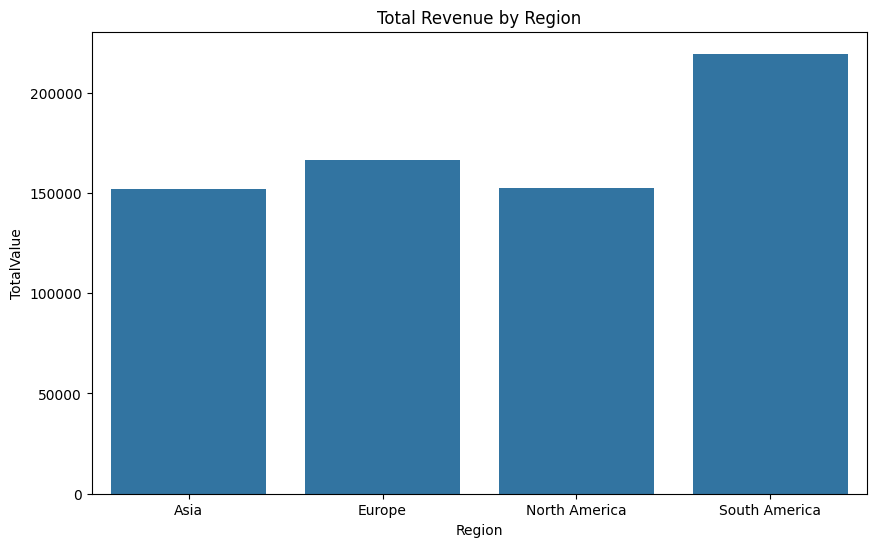

In [11]:
# total revenue 
region_revenue = merged_data.groupby("Region")["TotalValue"].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Region", y="TotalValue", data=region_revenue)
plt.title("Total Revenue by Region")
plt.show()




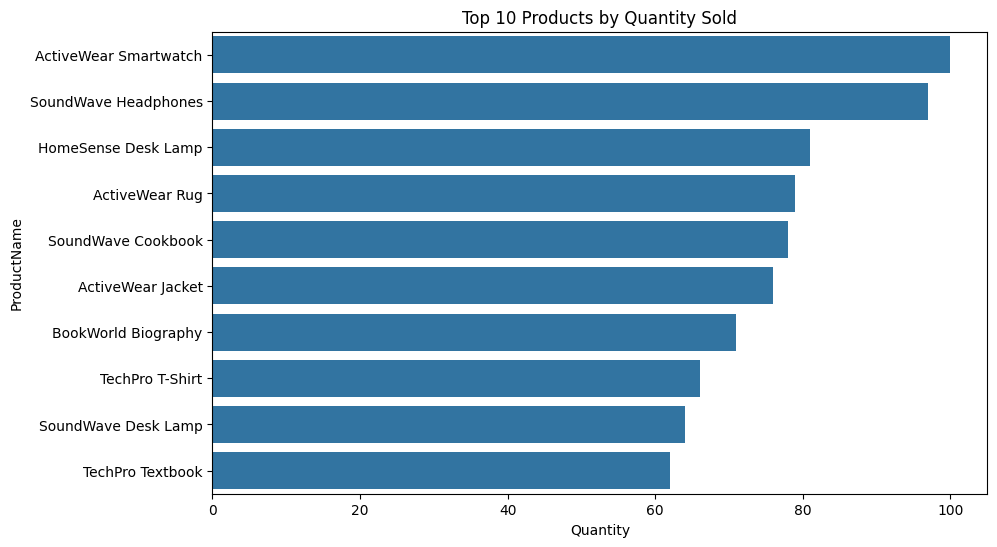

In [12]:
# Top 10 products by quantity sold
top_products = merged_data.groupby("ProductName")["Quantity"].sum().nlargest(10).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Quantity", y="ProductName", data=top_products)
plt.title("Top 10 Products by Quantity Sold")
plt.show()

<ipython-input-13-13516ed63735>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = merged_data.resample("M", on="TransactionDate")["TotalValue"].sum()


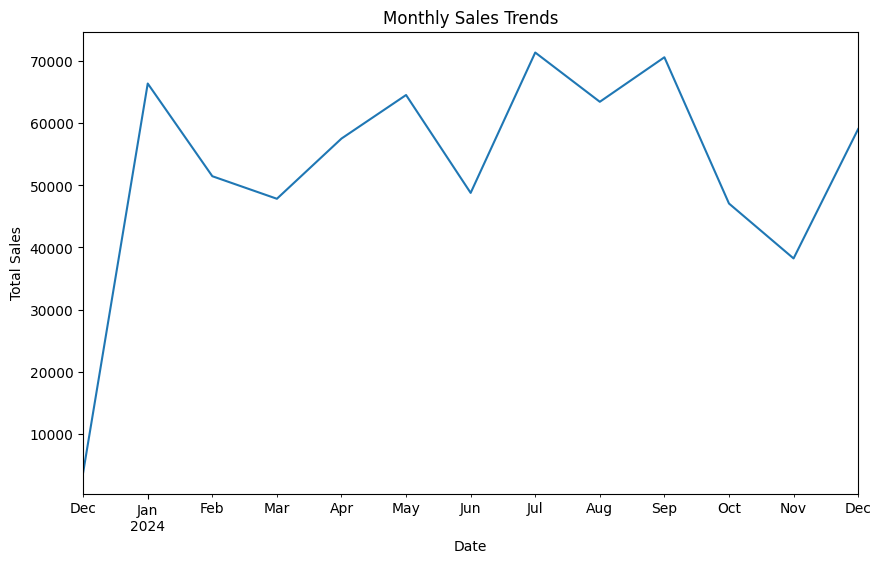

In [13]:

# sales trends 
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
monthly_sales = merged_data.resample("M", on="TransactionDate")["TotalValue"].sum()
plt.figure(figsize=(10, 6))
monthly_sales.plot()
plt.title("Monthly Sales Trends")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.show()

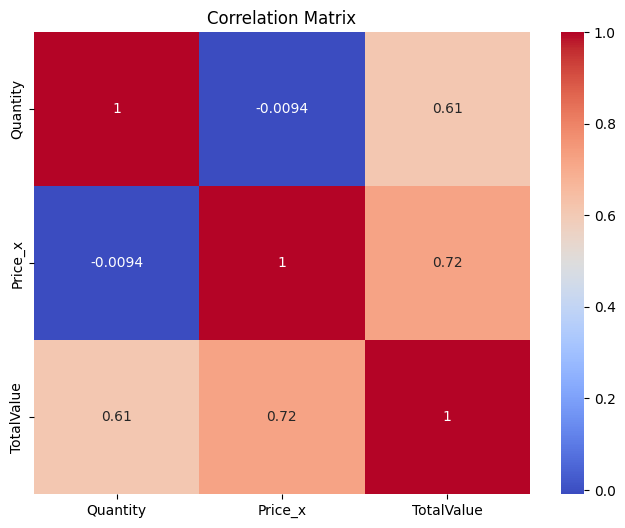

In [15]:
#  numerical features
correlation_matrix = merged_data[["Quantity", "Price_x", "TotalValue"]].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()